<h1><center> WebScraping </h1>
<h1><center> Anno Accademico 2022-2023 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 5 </h1>
<h1><center>    Pandas: Introduzione</h1>
<h1><center> 7 Febbraio 2023 </h1>

# Pandas

* libreria utilizzata per caricare, manipolare e visualizzare dati sequenziali e in forma di tabella, come *serie temporali* o fogli *csv*

* caratteristiche principali
    * caricare e salvare dati in formati tabulari "standard"
        * CSV (Comma-separated Values)
        * TSV (Tab-seprated values)
        * File Excel
        * Formati database
        *...
    * indicizzazione e aggregazione flessibile di serie e di tabelle
    * operazioni numeriche e statistiche efficienti
    * visualizzaione facile e immediata
* costruita su *NumPy*

# Pandas: Tipi di dato
* due tipi di dati principali
    * le **Series** rappresentano dati *1D*, come sequenze temporali, ...
    * i **Data Frame** reppresentano dati *2D* come un file csv, una tabella di un database, ...
* quale è la relazione tra i due?
    * ogni colonna di un *DataFrame* è una *Series*
* lavoreremo con entrambe le strutture esaminando un data-set reale

# Pandas: le Series

* array monodimensionale in cui ogni elemento è rappresentato da un  *indice*
    * una sequenza di valori
    * una corrispondente sequenza di indici o di label
    * le due componenti possono essere accedute, rispettivamente, con le funzioni *value* e *index*

* indici possono essere
    * di default: sequenze di numeri
    * label-based

*  simili a un dizionario di lunghezza fissa, con elementi ordinati, ma con alcune differenze
    * accessibili sia per indice che per label (se definita)
    * definiscono funzioni complesse che facilitano la manipolazione dei dati rispetto ai dizionari 

# Pandas: le Series

In [1]:
# importing pandas as pd
import pandas as pd
  
# Creazione di una serie
Regions = pd.Series(['Toscana', 'Sicilia', 'Puglia', 'Sardegna'])
  
# Print the series
print(Regions)


0     Toscana
1     Sicilia
2      Puglia
3    Sardegna
dtype: object


In [2]:
# Creating the row axis labels

Regions.index = ['Firenze', 'Palermo', 'Bari', 'Cagliari'] 

print(Regions)

Firenze      Toscana
Palermo      Sicilia
Bari          Puglia
Cagliari    Sardegna
dtype: object


# Pandas: Series a partire da Liste

In [3]:
Regions = pd.Series(['Toscana', 'Sicilia', 'Puglia', 'Sardegna'], ['Firenze', 'Palermo', 'Bari', 'Cagliari'] ) 
print(Regions)

Firenze      Toscana
Palermo      Sicilia
Bari          Puglia
Cagliari    Sardegna
dtype: object


# Pandas: Series a partire da dictionaries

In [4]:
Regions = pd.Series({'Firenze': 'Toscana', 'Palermo': 'Sicilia', 'Bari': 'Puglia', 'Cagliari':'Sardegna'})
print(Regions)

Firenze      Toscana
Palermo      Sicilia
Bari          Puglia
Cagliari    Sardegna
dtype: object


In [5]:
print(Regions.keys())
print()
print("Firenze" in Regions)
print()
print("Milano" in Regions)


Index(['Firenze', 'Palermo', 'Bari', 'Cagliari'], dtype='object')

True

False


# Pandas: Series, selection


* ogni series è caratterizzata da 
    * un *positional index*, implicito
       * funziona "come una lista"
    * un *label index*, esplicito
       * funziona "come un dictionary"
 

In [6]:
print (Regions[1])
print (Regions["Palermo"])


Sicilia
Sicilia


In [7]:
print (Regions[1:])


Palermo      Sicilia
Bari          Puglia
Cagliari    Sardegna
dtype: object


# Pandas: le Series, iloc e loc selection

* Supponiamo di utilizzare delle label numeriche per indicizzare gli elementi della serie

In [8]:
Regions = pd.Series(['Toscana', 'Sicilia', 'Puglia', 'Sardegna'], 
                     index=[2,4,6,8] ) 

print(Regions[2])


Toscana


* per evitare ambigità Pandas introduce due funzioni diverse
    * accesso per indice: *iloc*
    * accesso per label: *loc*

In [9]:
print(Regions.loc[2])
print(Regions.iloc[2])


Toscana
Puglia


# Pandas: data frames

* **DataFrame**: tabella bidimensionale di dati, con indice di riga e di colonna
    * simile a uno spreadsheet
    * una sequenza di oggetti di tipo Series che condividono lo stesso indice
    * le colonne sono oggetti di tipo Series, con le convenzioni di indicizzazione delle Series     

<center>
<img src="Figures/Dataframe.jpg" style="width:400px;height:260px;"/>

* column index (*df.columns*) generalmente è una lista di stringhe o, meno frequentemente, di numeri interi
* row index:
    * interi
    * stringhe
    * valori legati al tempo per time series

# Pandas: data frames


* tre attributi principali
    * **index**: contiene le etichette delle righe
    * **column** contiene le etichette delle colonne
    * **shape** contiene le dimensioni della tabella
    
* può essere creata a partire da 
    * strutture dati Python (un dizionario di **Series**, un dizionario di **list**, una lista di dizionari)
    * leggendo i dati da un file: caso più frequente quando si vuole caricare un data set in un Data Frame
      *  **CSV**
      *  **Excel**
      * **database MySQL**
      * ....(altri formati elencati più avanti)
      

# Pandas: creare un DataFrame da un dizionario  di Liste

* ogni elemento *D* del dizionario diventa una colonna del **DataFrame**
    * i nomi delle colonne sono presi dalle chiavi
    * valori nella colonna: lista di valori corrispondenti a ogni chiave
    * l'indice di riga è settato, per default,  a quello standard (intero)
    * l'indice delle varie Series diventa l'indice del Data Frame

In [10]:
import pandas as pd
df = pd.DataFrame ({ "Flower":  ["Violet", "Daisy", "Daffodils", "Chrysanthemum"],
                     "Month":   ["February", "April", "March", "November"] 
    })
print(f"{df}\n")
print(f"{df.shape}\n")
print(f"{df.columns}\n")
print(f"{df.index}\n")

          Flower     Month
0         Violet  February
1          Daisy     April
2      Daffodils     March
3  Chrysanthemum  November

(4, 2)

Index(['Flower', 'Month'], dtype='object')

RangeIndex(start=0, stop=4, step=1)



# Pandas: creare un DataFrame da un dizionario di liste

In [11]:
df = pd.DataFrame({'angles': [0, 3, 4],
                   'degrees': [360, 180, 360]},
                  index=['circle', 'triangle', 'rectangle'])
print(df)

           angles  degrees
circle          0      360
triangle        3      180
rectangle       4      360


# Pandas: creare un DataFrame concatenando Series

In [12]:
import pandas as pd
s1=pd.Series(["Violet", "Daisy", "Daffodils", "Chrysanthemum"])
s2=pd.Series(["February", "April", "March", "November"])
df = pd.concat([s1,s2], axis="columns", keys=["Flower", "Months"])
print(df)
print()
print(df.shape)
print()
print(df.index)
print()
print(df.values)
print()
print(df.columns)


          Flower    Months
0         Violet  February
1          Daisy     April
2      Daffodils     March
3  Chrysanthemum  November

(4, 2)

RangeIndex(start=0, stop=4, step=1)

[['Violet' 'February']
 ['Daisy' 'April']
 ['Daffodils' 'March']
 ['Chrysanthemum' 'November']]

Index(['Flower', 'Months'], dtype='object')


# Pandas: eliminare l'attributo 'axis

In [13]:
import pandas as pd
s1=pd.Series(["Violet", "Daisy", "Daffodils", "Chrysanthemum"])
s2=pd.Series(["February", "April", "March", "November"])
df = pd.concat([s1,s2],  keys=["Flower", "Months"])
print(df)
print()
print(df.shape)
print()
print(df.index)
print()
print(df.values)


Flower  0           Violet
        1            Daisy
        2        Daffodils
        3    Chrysanthemum
Months  0         February
        1            April
        2            March
        3         November
dtype: object

(8,)

MultiIndex([('Flower', 0),
            ('Flower', 1),
            ('Flower', 2),
            ('Flower', 3),
            ('Months', 0),
            ('Months', 1),
            ('Months', 2),
            ('Months', 3)],
           )

['Violet' 'Daisy' 'Daffodils' 'Chrysanthemum' 'February' 'April' 'March'
 'November']


# Pandas: creare un DataFrame concatenando Series

* se gli indici delle serie di input non corrispondono, le regole di allineamento vengono applicate e i valori mancanti
  diventano *NaN*.
  * *NaN* not-a number: indica in generale che alcuni dati sono mancanti
* accade solo se gli indici sono definiti esplicitamente

In [35]:
import pandas as pd
s1=pd.Series(["Violet", "Daisy", "Daffodils", "Chrysanthemum"],index=["a","b","c","d"])
s2=pd.Series(["February", "April", "March", "November"], index=["a","b","c","e"])
df = pd.concat([s1,s2], axis="columns", keys=["Flower", "Months"])
print(df)
print()
print(df.shape)
print()
print(df.columns)
print()
print(df.index)

          Flower    Months
a         Violet  February
b          Daisy     April
c      Daffodils     March
d  Chrysanthemum       NaN
e            NaN  November

(5, 2)

Index(['Flower', 'Months'], dtype='object')

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


# Pandas: importare i dati da un fle CSV


* csv: un formato semplice, testuale, utilizzato per scambiare dati
* plain-text usato per rappresentare dati tabular
    * la prima riga contiene i nomi delle colonne della tebella
    * ogni altra riga del file corrisponde a una riga della tabella
    * ogni riga contiene un numero finito di elementi che corrispondono alle diverse colonne della tabella
        * ogni elemento separato dal successivo da una virgola
        * righe separate da un 
* può essere creato a partire da un file *Excel*

<center>
<img src="Figures/CSVFile.jpg" style="width:400px;height:260px;"/>

# Ex1: importare i dati da un fle CSV, l'IRIS Data Set 

* uno dei DataSet "storici" e più noti
* 50 campioni presi da ognuna delle 3 specie di *Iris*
    * *Iris Setosa*
    * *Iris Virginica*
    * *Iris Versicolor*
* per ogni campione viene misurata lunghezza e ampiezza
    * dei petali
    * dei sepali
* utilizzato come test case per diverse tecniche di machine learning

<center>
<img src="Figures/Iris.jpg" style="width:700px;height:300px;"/>

# Ex1: importare i dati da un fle CSV, l'Iris Data Set

In [16]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import os
print(os.getcwd())
print()
dataframe = pd.read_csv('DataSet/IrisDataSet.csv')
print(dataframe)

C:\Users\ricci\Dropbox\My_Drop_Home\Didattica\WebScraping\Notebook\Notebook_e_slides\Notebook070223

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


* Pandas inserisce '...' nel caso il numero di righe (o di colonne) risulti troppo elevato

# Approfondimento: Struttura del Data Frame

<center>
<img src="Figures/DataFrameLegend.jpg" style="width:1200px;height:350px;"/>

# Ex1: una prima analisi del Data Set

In [17]:
print(dataframe.shape)
print(len(dataframe))


(150, 5)
150


In [18]:
print(dataframe.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [19]:
print(dataframe.tail())


     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


# Ex1: una prima analisi del Data Set

In [20]:
print(dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


* per capire il tipo degli oggetti contenuti nelle diverse colonne del dataset
* tipo *object*
    * dalla documentazione: "The object data type is “a catch-all for columns that Pandas doesn’t recognize 
      as any other specific type.” 
    * in partica utilizzato per valori di tipo stringa

# Ex1: una prima analisi del Data Set

In [1]:
print(dataframe.describe())


NameError: name 'dataframe' is not defined

* *df-describe()*
    * fornisce un resoconto sintetico sul contenuto della tabella
    * default: analizza solamente le colonne numeriche
    * per visualizzare informazioni anche sulle colonen non numeriche

In [21]:
print(dataframe.describe(include=object))


       species
count      150
unique       3
top     setosa
freq        50


# Ex1: una prima analisi del Data Set

In [22]:
print(dataframe["species"].value_counts())

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


# Ex1: estrarre un sottoinsieme del  Data Set

In [23]:
import numpy as np
np.random.seed(0)
print(np.random.permutation(dataframe.shape[0]))
print()
small_iris_ds = dataframe.iloc[np.random.permutation(dataframe.shape[0])].head()
print(small_iris_ds.shape)
print()
print(small_iris_ds)


[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28
  55  75  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49
 136  99  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36
  21   9 103  67 117  47]

(5, 5)

     sepal_length  sepal_width  petal_length  petal_width     species
92            5.8          2.6           4.0          1.2  versicolor
141           6.9          3.1           5.1          2.3   virginica
130           7.4          2.8           6.1          1.9   virginica
119           6.0          2.2           5.0          1.5   virginica
48            5.3          3.7 

# Ex1: accedere a colonne e a righe

In [24]:
print(small_iris_ds[["sepal_length", "petal_length"]])


     sepal_length  petal_length
92            5.8           4.0
141           6.9           5.1
130           7.4           6.1
119           6.0           5.0
48            5.3           1.5


In [25]:
print(small_iris_ds.iloc[0]) 


sepal_length           5.8
sepal_width            2.6
petal_length           4.0
petal_width            1.2
species         versicolor
Name: 92, dtype: object


In [26]:
print(small_iris_ds.loc[130])


sepal_length          7.4
sepal_width           2.8
petal_length          6.1
petal_width           1.9
species         virginica
Name: 130, dtype: object


# Ex1: Broadcasting

In [ ]:
print(small_iris_ds)
print(small_iris_ds["sepal_length"] + small_iris_ds["sepal_width"])


# Ex1:  Broadcasting

In [37]:
print(small_iris_ds+small_iris_ds)


     sepal_length  sepal_width  petal_length  petal_width  \
92           11.6          5.2           8.0          2.4   
141          13.8          6.2          10.2          4.6   
130          14.8          5.6          12.2          3.8   
119          12.0          4.4          10.0          3.0   
48           10.6          7.4           3.0          0.4   

                  species  
92   versicolorversicolor  
141    virginicavirginica  
130    virginicavirginica  
119    virginicavirginica  
48           setosasetosa  


# Ex 1:  Statistics

In [38]:
print(small_iris_ds.loc[130][:-1].mean()) 
print()
print(small_iris_ds.petal_length.mean())
print()
print(small_iris_ds.mean(numeric_only='True'))
      

4.549999999999999

4.34

sepal_length    6.28
sepal_width     2.88
petal_length    4.34
petal_width     1.42
dtype: float64


# Ex 1: Statistics

In [39]:
print(small_iris_ds[["species", "petal_length", "sepal_length"]]
      [small_iris_ds.petal_length > small_iris_ds.petal_length.mean()])


       species  petal_length  sepal_length
141  virginica           5.1           6.9
130  virginica           6.1           7.4
119  virginica           5.0           6.0


# Ex 1:  Plotting Series e DataFrames

* sia le  Series che i DataFrame objects definiscono un metodo .plot() 
* un wrapper costruito su *matplotlib.pyplot.plot()*
* di default, crea un line plot 

<AxesSubplot: >

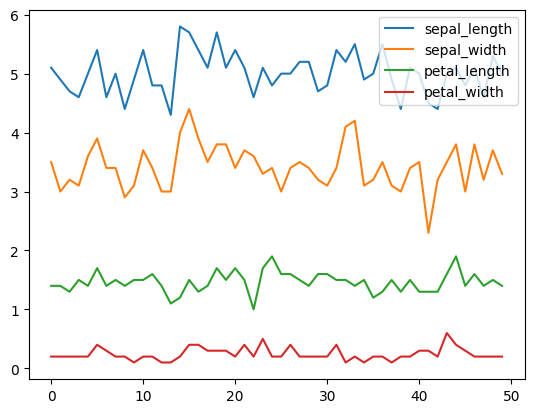

In [27]:
dataframe[dataframe["species"] == "setosa"].plot()


# Ex 1:  Plotting Series e DataFrames

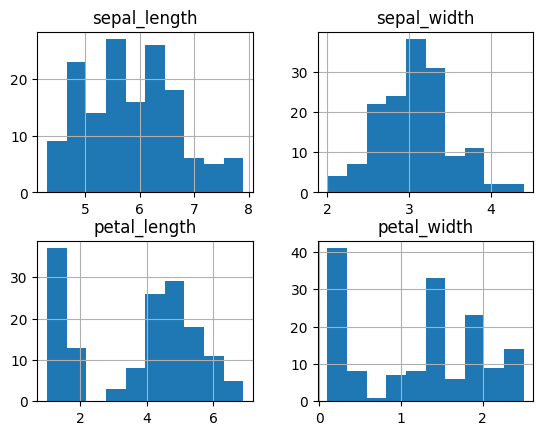

In [44]:
dataframe.hist()
plt.show()


# Ex 1:  Plotting Series e DataFrames

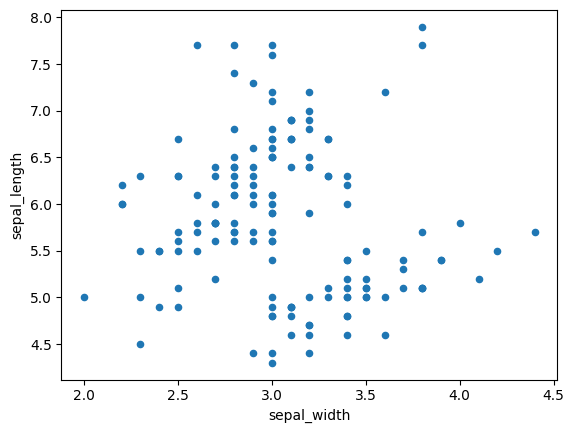

In [43]:
dataframe.plot.scatter(  x="sepal_width", y="sepal_length")
plt.show()


# Ex 1:  Plotting Series e DataFrames

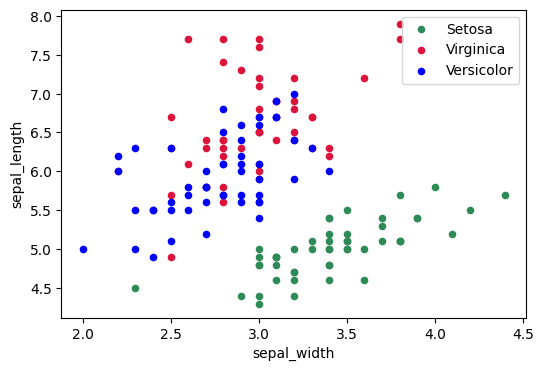

In [42]:
setosa = dataframe[dataframe['species']=='setosa']
virginica = dataframe[dataframe['species']=='virginica']
versicolor = dataframe[dataframe['species']=='versicolor']

fig, ax = plt.subplots(figsize=(6, 4))
setosa.plot.scatter(x='sepal_width', y='sepal_length',  c='seagreen',label='Setosa', ax=ax, )
virginica.plot.scatter(x='sepal_width', y='sepal_length',c='crimson',label='Virginica', ax=ax)
versicolor.plot.scatter(x='sepal_width', y='sepal_length',c='blue',label='Versicolor', ax=ax)
plt.legend()
plt.show()


# Ex 1:  Plotting Series e DataFrames

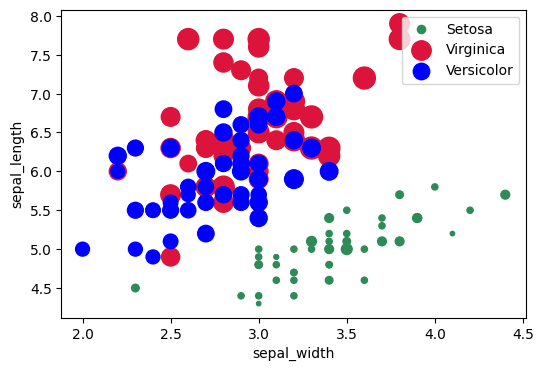

In [41]:
import warnings
warnings.filterwarnings('ignore')
setosa = dataframe[dataframe['species']=='setosa']
virginica = dataframe[dataframe['species']=='virginica']
versicolor = dataframe[dataframe['species']=='versicolor']
                       
setosa.petal_width=setosa.petal_width*100
virginica.petal_width=virginica.petal_width*100
versicolor.petal_width=versicolor.petal_width*100
fig, ax = plt.subplots(figsize=(6, 4))
setosa.plot.scatter(x='sepal_width', y='sepal_length',  c='seagreen',s='petal_width', label='Setosa', ax=ax, )
virginica.plot.scatter(x='sepal_width', y='sepal_length',c='crimson',s='petal_width', label='Virginica', ax=ax)
versicolor.plot.scatter(x='sepal_width', y='sepal_length',c='blue',s='petal_width',label='Versicolor', ax=ax)
plt.legend()
plt.show()


# Ex 1:  Plotting Series e DataFrames

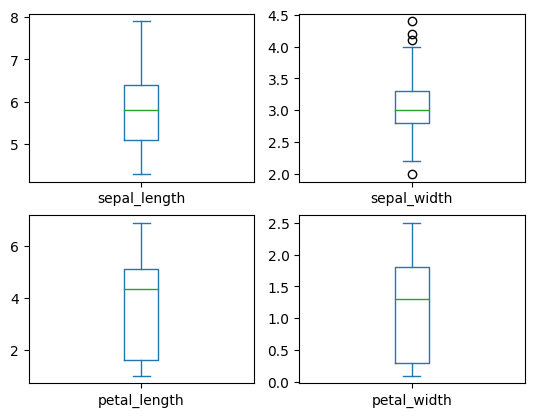

In [40]:
dataframe.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()


* *box plot*: quartili, mediana, outliers (li vedremo più in dettaglio in seguito)

# Ex 1:  Plotting Series e DataFrames

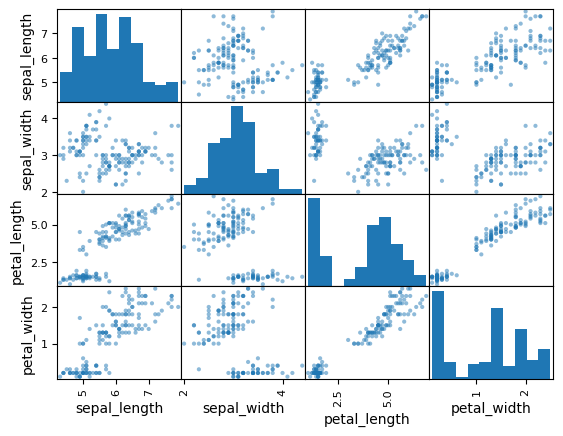

In [45]:
# scatter plot matrix
scatter_matrix(dataframe)
plt.show()

# Ex 1:  Plotting Series e DataFrames

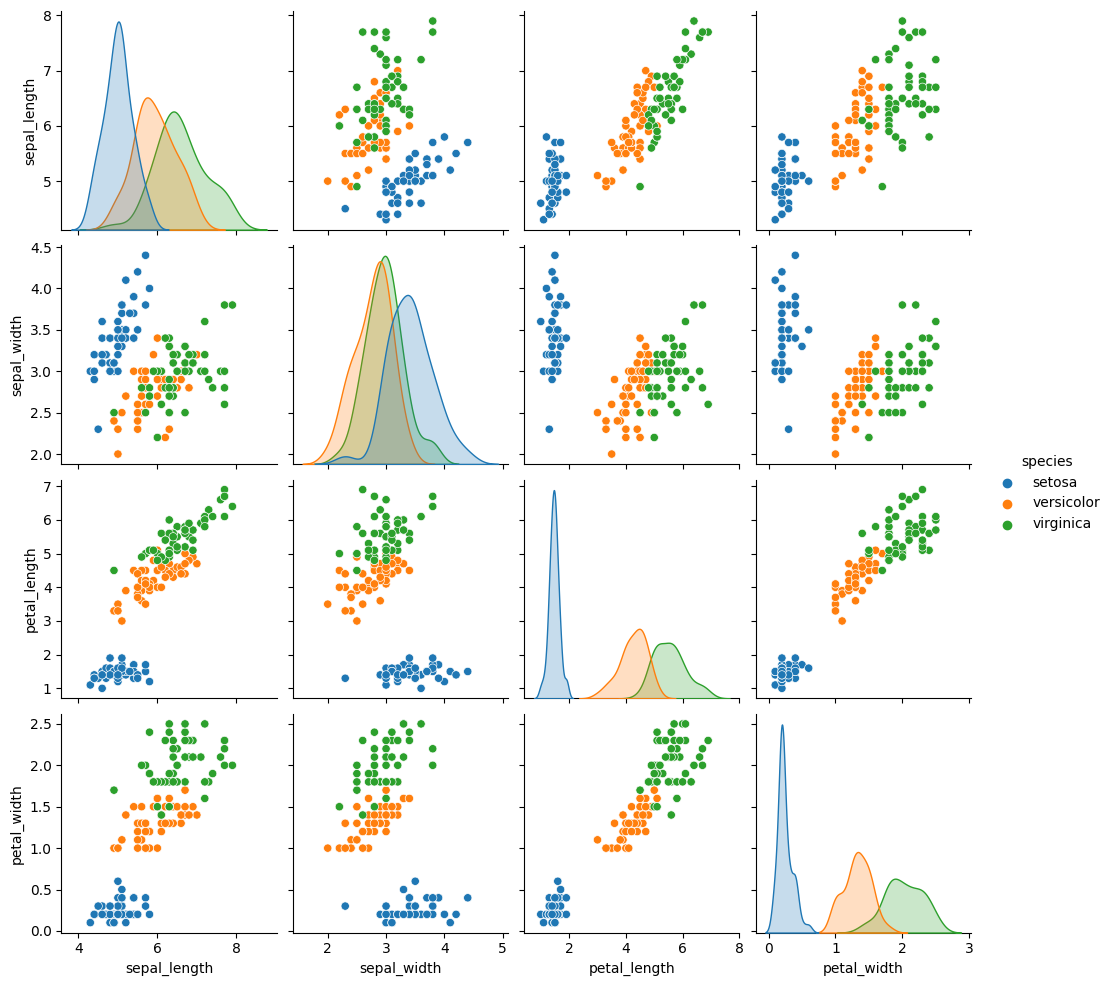

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sb
sb.pairplot(dataframe, hue="species")


# Approfondimenti: dove stanno i miei data sets?


In [56]:
import os
print(os.getcwd())
print()
print(os.listdir(os.getcwd()))
print(os.listdir)
try:
    os.chdir('DataSet')
    print(os.getcwd())
    print(os.listdir)
except OSError:
    print("La directory non esiste")
    

C:\Users\ricci\Dropbox\My_Drop_Home\Didattica\WebScraping\Notebook\Notebook_e_slides\Notebook070223\DataSet

['IrisDataSet.csv', 'Top-50-crypto']
<built-in function listdir>
La directory non esiste


# Approfondimenti: Formati Supportati

<center>
<img src="Figures/FormatiSupportati.jpg" style="width:600px;height:350px;"/>

# ..e che altro posso fare con Pandas?

* selezionare le colonne del DataFrame
* selezionare le righe del DataFrame
* selezionare le celle
* join/merge/concat di Serie e Frame
* pivot tables
* lavorare con le date
* plottare i valori nei Data Frame: introduce un insieme di funzioni specifiche per dati tabellari
* lavorare quando alcuni dati sono mancanti
* calcolare le funzioni base di statistica descrittiva

* non faremo un elenco di tutte queste funzioni ("boring!), ma cercheremo di presentarle "by example", o  alternativamente....


<center>
<img src="Figures/RTFM.jpg" style="width:300px;height:160px;"/>

# Approfondimenti: lavorare con le colonne

In [49]:
fish_measures = {'Fish': ['Angelfish', 'Zebrafish', 'Killifish', 'Swordtail'],
                 'Length':[15.2, 6.5, 9, 6],
                 'Width': [7.7, 2.1, 4.5, 2]}

print(fish_measures)
zebrafish_index = fish_measures['Fish'].index('Zebrafish')
zebrafish_length = fish_measures['Length'][zebrafish_index]
print(f"The length of a zebrafish is {zebrafish_length:.2f} cm")


{'Fish': ['Angelfish', 'Zebrafish', 'Killifish', 'Swordtail'], 'Length': [15.2, 6.5, 9, 6], 'Width': [7.7, 2.1, 4.5, 2]}
The length of a zebrafish is 6.50 cm


# Approfondimenti: lavorare con le colonne

In [50]:
df=pd.DataFrame(fish_measures)
print(df)
idx = df.columns # get col index
print(idx)
label = df.columns[0] # first col label
print(label)
l = df.columns.tolist() # list of col labels
print(l)
a = df.columns.values # array of col labels
print(a)


        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1
2  Killifish     9.0    4.5
3  Swordtail     6.0    2.0
Index(['Fish', 'Length', 'Width'], dtype='object')
Fish
['Fish', 'Length', 'Width']
['Fish' 'Length' 'Width']


# Approfondimenti: modificare le colonne

In [51]:
df.columns = ['Name', 'L', 'W']
print(df)


        Name     L    W
0  Angelfish  15.2  7.7
1  Zebrafish   6.5  2.1
2  Killifish   9.0  4.5
3  Swordtail   6.0  2.0


In [52]:
df = df.rename(columns={'Name':'Nome','L':'Lunghezza','W':'Larghezza'})
print(df)


        Nome  Lunghezza  Larghezza
0  Angelfish       15.2        7.7
1  Zebrafish        6.5        2.1
2  Killifish        9.0        4.5
3  Swordtail        6.0        2.0


# Approfondimenti: selezionare le colonne per nome

In [53]:
s = df['Nome'] # select col to Series
print(s)
df1 = df[['Nome']] # select col to df1
print (df1)
df2 = df[['Nome','Larghezza']] # select 2-plus cols to df2
print (df2)
print(df)


0    Angelfish
1    Zebrafish
2    Killifish
3    Swordtail
Name: Nome, dtype: object
        Nome
0  Angelfish
1  Zebrafish
2  Killifish
3  Swordtail
        Nome  Larghezza
0  Angelfish        7.7
1  Zebrafish        2.1
2  Killifish        4.5
3  Swordtail        2.0
        Nome  Lunghezza  Larghezza
0  Angelfish       15.2        7.7
1  Zebrafish        6.5        2.1
2  Killifish        9.0        4.5
3  Swordtail        6.0        2.0


# Approfondimenti: selezionare le colonne per indice

In [54]:
s = df[df.columns[0]] # select by number
print(s)
df1 = df[df.columns[[0, 1]]] # by numbers
print (df1)
df2 = [df.columns[:-1]] # all but last col
print(df2)
s = df.pop('Larghezza') # get & drop from df
print(s)


0    Angelfish
1    Zebrafish
2    Killifish
3    Swordtail
Name: Nome, dtype: object
        Nome  Lunghezza
0  Angelfish       15.2
1  Zebrafish        6.5
2  Killifish        9.0
3  Swordtail        6.0
[Index(['Nome', 'Lunghezza'], dtype='object')]
0    7.7
1    2.1
2    4.5
3    2.0
Name: Larghezza, dtype: float64


# Approfondimenti: operazioni aritmetiche su intere colonne

In [55]:
print(df)
df['Lunghezza']=df['Lunghezza']*100
print(df)


        Nome  Lunghezza
0  Angelfish       15.2
1  Zebrafish        6.5
2  Killifish        9.0
3  Swordtail        6.0
        Nome  Lunghezza
0  Angelfish     1520.0
1  Zebrafish      650.0
2  Killifish      900.0
3  Swordtail      600.0


# Assignment 2

* si consideri il data set *SeoulBikeData* (fornito in allegato)

* il dataset, nel formato CSV, contiene dati riguardanti le biciclette noleggiate a Seul,  in ogni ora.

* il dataset ha 14 colonne 14 colonne, contenenti le segeunti informaizoni:
    * Date: year-month-day
    * Rented Bike count: Count of bikes rented at each hou
    * Hour: Hour of the day
    * Temperature: In Celsius
    * Humidity: Percentage (%) of humidity
    * Windspeed: In meters per second (m/s)
    * Visibility: In 10 meters (10m)
    * Dew point temperature: In Celsius
    * Solar radiation: In megajoules per meter squared (MJ/m2)
    * Rainfall: In millimeters (mm)
    * Snowfall: In centimeters (cm)
    * Seasons: Winter, Spring, Summer, Autumn
    * Holiday: Holiday/No holiday
    * Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

# Assignment 2

* per la lettura del dataset dal file *CSV*, si utilizzi la seguente istruzione, che permette di parsare la data in un formato Pandas e indica l'encoding dei caratteri nel DateaSet

In [ ]:
data = pd.read_csv("SeoulBikeData.csv", encoding = 'unicode_escape', parse_dates=['Date'])

* dopo aver importato il dataset in Pandas
    * analizzare le sue caratteristiche generali
    * visualizzare Data, ora e numero totale di biciclette prese a nolo nella data 2017-08-12
    * visualizzare il numero totale di biclette prese a nolo tra le 8 e le 20 in quella data
    * plottare alcuni grafici che mettano in evidenza caratteristiche interessanti del data set